<h1>EDA</h1>

In [98]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm, skew

pd.set_option('display.float_format', '{:.4f}'.format)

import warnings
warnings.simplefilter(action='ignore')

<h2>Houses for rent</h2>

In [99]:
houses_for_rent = pd.read_csv('data/houses_for_rent.csv')

In [100]:
houses_for_rent.duplicated().any()

True

In [101]:
houses_for_rent[houses_for_rent.duplicated(keep=False)]

,Title,Location,Bedrooms,Bathrooms,Size,Date,Amenities,Url,Property Type,Payment_type,Price
102,4 Bed Townhouse with Swimming Pool in Kiambu Road,Kiambu Road,4.0000,5.0000,NaN,30/07/2024,"['Backup Generator', 'Gated Community', 'Swimm...",/listings/4-bedroom-townhouse-for-rent-kiambu-...,houses,rent,"KSh 330,000\n / month"
103,4 Bed Townhouse with Swimming Pool in Kiambu Road,Kiambu Road,4.0000,5.0000,NaN,30/07/2024,"['Backup Generator', 'Gated Community', 'Swimm...",/listings/4-bedroom-townhouse-for-rent-kiambu-...,houses,rent,"KSh 330,000\n / month"
1225,4 Bed Townhouse with En Suite in Kitisuru,"Kitisuru, Westlands",4.0000,4.0000,NaN,24/07/2024,"['Aircon', 'Alarm', 'BBQ', 'Backup Generator',...",/listings/4-bedroom-townhouse-for-rent-kitisur...,houses,rent,"KSh 200,000\n / month"
1226,4 Bed Townhouse with En Suite in Kitisuru,"Kitisuru, Westlands",4.0000,4.0000,NaN,24/07/2024,"['Aircon', 'Alarm', 'BBQ', 'Backup Generator',...",/listings/4-bedroom-townhouse-for-rent-kitisur...,houses,rent,"KSh 200,000\n / month"
1535,4 Bed Villa with En Suite in Spring Valley,"Spring Valley, Westlands",4.0000,NaN,NaN,18/06/2024,"['Alarm', 'BBQ', 'Backup Generator', 'CCTV', '...",/listings/4-bedroom-villa-for-rent-spring-vall...,houses,rent,"KSh 400,000\n / month"
1536,4 Bed Villa with En Suite in Spring Valley,"Spring Valley, Westlands",4.0000,NaN,NaN,18/06/2024,"['Alarm', 'BBQ', 'Backup Generator', 'CCTV', '...",/listings/4-bedroom-villa-for-rent-spring-vall...,houses,rent,"KSh 400,000\n / month"


In [102]:
houses_for_rent.drop_duplicates(ignore_index=True, inplace=True)

In [103]:
houses_for_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          2172 non-null   object 
 1   Location       2172 non-null   object 
 2   Bedrooms       2169 non-null   float64
 3   Bathrooms      2035 non-null   float64
 4   Size           268 non-null    object 
 5   Date           2172 non-null   object 
 6   Amenities      2172 non-null   object 
 7   Url            2172 non-null   object 
 8   Property Type  2172 non-null   object 
 9   Payment_type   2172 non-null   object 
 10  Price          2172 non-null   object 
dtypes: float64(2), object(9)
memory usage: 186.8+ KB


Fill Bedrooms Missing values

In [104]:
houses_for_rent.Bedrooms.describe()

count   2169.0000
mean       4.2651
std        1.1292
min        1.0000
25%        4.0000
50%        4.0000
75%        5.0000
max       10.0000
Name: Bedrooms, dtype: float64

In [105]:
houses_for_rent[houses_for_rent.Bedrooms.isna()]

,Title,Location,Bedrooms,Bathrooms,Size,Date,Amenities,Url,Property Type,Payment_type,Price
1372,Villa in Kiambu Road,Kiambu Road,NaN,NaN,NaN,04/06/2024,[],/listings/villa-for-rent-kiambu-road-3671721,houses,rent,"KSh 275,000\n / month"
1699,Villa in Runda,"Runda, Westlands",NaN,NaN,NaN,27/03/2024,[],/listings/villa-for-rent-runda-3671719,houses,rent,"KSh 1,500,000\n / month"
1700,House in Nyari,"Nyari, Westlands",NaN,NaN,NaN,05/07/2024,[],/listings/house-for-rent-nyari-3671616,houses,rent,"KSh 380,000\n / month"


In [106]:
houses_for_rent['Bedrooms'] = houses_for_rent.Bedrooms.fillna(houses_for_rent.Bedrooms.median())
houses_for_rent.Bedrooms.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2172 entries, 0 to 2171
Series name: Bedrooms
Non-Null Count  Dtype  
--------------  -----  
2172 non-null   float64
dtypes: float64(1)
memory usage: 17.1 KB


In [107]:
houses_for_rent.duplicated().any()

False

Fill Bathroom missing values

In [108]:
print(f"No. of bedrooms equal to bathrooms {houses_for_rent[houses_for_rent['Bedrooms'] == houses_for_rent['Bathrooms']].Bedrooms.count()}")
print(f"No. of bedrooms greater than bathrooms {houses_for_rent[houses_for_rent['Bedrooms'] > houses_for_rent['Bathrooms']].Bedrooms.count()}")
print(f"No. of bedrooms less than bathrooms {houses_for_rent[houses_for_rent['Bedrooms'] < houses_for_rent['Bathrooms']].Bedrooms.count()}")

No. of bedrooms equal to bathrooms 1304
No. of bedrooms greater than bathrooms 289
No. of bedrooms less than bathrooms 442


In [109]:
isna_id = houses_for_rent[houses_for_rent.Bathrooms.isna()].index

In [110]:
isna_id

Index([  55,   64,   66,   88,  120,  122,  136,  153,  184,  200,
       ...
       1918, 1922, 1940, 1941, 1946, 1955, 2026, 2105, 2158, 2167],
      dtype='int64', length=137)

In [111]:
houses_for_rent['Bathrooms'] = houses_for_rent.Bathrooms.fillna(houses_for_rent.Bedrooms)

In [112]:
houses_for_rent[['Bedrooms', 'Bathrooms']].iloc[isna_id].head()

,Bedrooms,Bathrooms
55,4.0000,4.0000
64,4.0000,4.0000
66,4.0000,4.0000
88,4.0000,4.0000
120,3.0000,3.0000


In [113]:
print(f"No. of bedrooms equal to bathrooms {houses_for_rent[houses_for_rent['Bedrooms'] == houses_for_rent['Bathrooms']].Bedrooms.count()}")
print(f"No. of bedrooms greater than bathrooms {houses_for_rent[houses_for_rent['Bedrooms'] > houses_for_rent['Bathrooms']].Bedrooms.count()}")
print(f"No. of bedrooms less than bathrooms {houses_for_rent[houses_for_rent['Bedrooms'] < houses_for_rent['Bathrooms']].Bedrooms.count()}")

No. of bedrooms equal to bathrooms 1441
No. of bedrooms greater than bathrooms 289
No. of bedrooms less than bathrooms 442


In [114]:
houses_for_rent.Bathrooms.value_counts()

Bathrooms
5.0000     702
4.0000     628
6.0000     277
3.0000     269
2.0000     170
1.0000      60
7.0000      47
8.0000      16
10.0000      3
Name: count, dtype: int64

Drop irrelevant columns

In [115]:
houses_for_rent.drop(['Size', 'Url', 'Title'], axis=1, inplace=True)

In [116]:
houses_for_rent.duplicated().any()

True

In [117]:
houses_for_rent.duplicated().sum()

22

In [118]:
houses_for_rent.drop_duplicates(ignore_index=True, inplace=True)

In [119]:
houses_for_rent.columns

Index(['Location', 'Bedrooms', 'Bathrooms', 'Date', 'Amenities',
       'Property Type', 'Payment_type', 'Price'],
      dtype='object')

Drop rows with missing price values

In [120]:
houses_for_rent = houses_for_rent[houses_for_rent['Price'] != 'Price not communicated'].reset_index(drop=True)

Final House Dataframe

In [121]:
houses_for_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2137 entries, 0 to 2136
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       2137 non-null   object 
 1   Bedrooms       2137 non-null   float64
 2   Bathrooms      2137 non-null   float64
 3   Date           2137 non-null   object 
 4   Amenities      2137 non-null   object 
 5   Property Type  2137 non-null   object 
 6   Payment_type   2137 non-null   object 
 7   Price          2137 non-null   object 
dtypes: float64(2), object(6)
memory usage: 133.7+ KB


<h2>Apartments for rent</h2>

In [122]:
apartments_for_rent = pd.read_csv('data/apartments_for_rent.csv')

In [123]:
apartments_for_rent.duplicated().any()

True

We will drop the duplicated rows after cleaning the dataframe

In [124]:
apartments_for_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2971 entries, 0 to 2970
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          2971 non-null   object 
 1   Location       2971 non-null   object 
 2   Bedrooms       2969 non-null   float64
 3   Bathrooms      2720 non-null   float64
 4   Size           581 non-null    object 
 5   Date           2971 non-null   object 
 6   Amenities      2971 non-null   object 
 7   Url            2971 non-null   object 
 8   Property Type  2971 non-null   object 
 9   Payment_type   2971 non-null   object 
 10  Price          2971 non-null   object 
dtypes: float64(2), object(9)
memory usage: 255.4+ KB


In [125]:
apartments_for_rent['Bedrooms'] = apartments_for_rent['Bedrooms'].fillna(apartments_for_rent.Bedrooms.median())

In [126]:
apartments_for_rent.Bathrooms = apartments_for_rent.Bathrooms.fillna(apartments_for_rent.Bedrooms)

In [127]:
apartments_for_rent.Bathrooms.value_counts()

Bathrooms
2.0000    1064
3.0000     840
4.0000     491
1.0000     437
5.0000     117
6.0000      11
0.0000       9
7.0000       1
9.0000       1
Name: count, dtype: int64

In [128]:
apartments_for_rent[apartments_for_rent.Price == 'Price not communicated'].Bedrooms.count()

14

In [129]:
apartments_for_rent = apartments_for_rent[apartments_for_rent.Price != 'Price not communicated']

In [130]:
apartments_for_rent.drop(['Size', 'Url', 'Title'], axis=1, inplace=True)

In [131]:
apartments_for_rent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2957 entries, 0 to 2970
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       2957 non-null   object 
 1   Bedrooms       2957 non-null   float64
 2   Bathrooms      2957 non-null   float64
 3   Date           2957 non-null   object 
 4   Amenities      2957 non-null   object 
 5   Property Type  2957 non-null   object 
 6   Payment_type   2957 non-null   object 
 7   Price          2957 non-null   object 
dtypes: float64(2), object(6)
memory usage: 207.9+ KB


In [132]:
apartments_for_rent[apartments_for_rent.duplicated(keep=False)].head(10)

,Location,Bedrooms,Bathrooms,Date,Amenities,Property Type,Payment_type,Price
500,Kileleshwa,1.0000,1.0000,06/07/2024,"['BBQ', 'Backup Generator', 'Balcony', 'Boreho...",flats-apartments,rent,"KSh 70,000\n / month"
586,Lavington,2.0000,2.0000,27/07/2024,"['Alarm', 'BBQ', 'Backup Generator', 'Balcony'...",flats-apartments,rent,"KSh 200,000\n / month"
635,"Spring Valley, Westlands",2.0000,2.0000,20/07/2024,"['Alarm', 'Backup Generator', 'Balcony', 'Bus ...",flats-apartments,rent,"KSh 280,000\n / month"
637,"Spring Valley, Westlands",2.0000,2.0000,20/07/2024,"['Alarm', 'Backup Generator', 'Balcony', 'Bus ...",flats-apartments,rent,"KSh 280,000\n / month"
648,Kileleshwa,2.0000,2.0000,19/07/2024,"['Alarm', 'Backup Generator', 'Balcony', 'Bore...",flats-apartments,rent,"KSh 100,000\n / month"
650,Kileleshwa,2.0000,2.0000,19/07/2024,"['Alarm', 'Backup Generator', 'Balcony', 'Bore...",flats-apartments,rent,"KSh 100,000\n / month"
685,Kileleshwa,3.0000,3.0000,27/07/2024,"['Alarm', 'BBQ', 'Backup Generator', 'Balcony'...",flats-apartments,rent,"KSh 250,000\n / month"
698,"Riverside, Westlands",2.0000,3.0000,18/07/2024,"['Alarm', 'BBQ', 'Backup Generator', 'Balcony'...",flats-apartments,rent,"KSh 280,000\n / month"
699,"Riverside, Westlands",2.0000,3.0000,18/07/2024,"['Alarm', 'BBQ', 'Backup Generator', 'Balcony'...",flats-apartments,rent,"KSh 280,000\n / month"
732,"Westlands Area, Westlands",3.0000,3.0000,27/07/2024,"['Alarm', 'BBQ', 'Backup Generator', 'Balcony'...",flats-apartments,rent,"KSh 300,000\n / month"


In [133]:
apartments_for_rent.duplicated().sum()

40

In [134]:
apartments_for_rent.drop_duplicates(inplace=True, ignore_index=True)

<h2>Bedsitters for rent</h2>

In [135]:
bedsitter_for_rent = pd.read_csv('data/bedsitter_for_rent.csv')

In [136]:
bedsitter_for_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          11 non-null     object 
 1   Location       11 non-null     object 
 2   Bedrooms       0 non-null      float64
 3   Bathrooms      0 non-null      float64
 4   Size           0 non-null      float64
 5   Date           11 non-null     object 
 6   Amenities      11 non-null     object 
 7   Url            11 non-null     object 
 8   Property Type  11 non-null     object 
 9   Payment_type   11 non-null     object 
 10  Price          11 non-null     object 
dtypes: float64(3), object(8)
memory usage: 1.1+ KB


Cant use Bedsitters for rent

<h2> Commercial Property for sale </h2>

In [137]:
commercial_prop_for_rent = pd.read_csv('data/commercial_prop_for_rent.csv')

In [138]:
commercial_prop_for_rent.head()

,Title,Location,Bedrooms,Bathrooms,Size,Date,Amenities,Url,Property Type,Payment_type,Price
0,Shop with Service Charge Included at Kenyatta ...,"Kenyatta Avenue & Moi Avenue Intersection, Nai...",NaN,NaN,NaN,25/04/2024,"['Alarm', 'Backup Generator', 'CCTV', 'Fibre I...",/listings/shop-for-rent-nairobi-cbd-3-3529200,commercial-property,rent,"KSh 50,000\n / month"
1,Warehouse with Service Charge Included in Kamakis,"Kamakis, Ruiru",NaN,NaN,NaN,15/07/2024,"['Alarm', 'Backup Generator', 'CCTV', 'Fibre I...",/listings/warehouse-for-rent-kamakis-3705645,commercial-property,rent,"KSh 145,800\n / month"
2,Furnished Office with Service Charge Included ...,"Westlands Area, Westlands",NaN,NaN,NaN,15/04/2024,"['Alarm', 'Backup Generator', 'Balcony', 'CCTV...",/listings/furnished-office-for-rent-westlands-...,commercial-property,rent,"KSh 70,000\n / month"
3,Commercial Property with Fibre Internet at Lav...,"Maziwa, Lavington Green, Lavington",NaN,NaN,NaN,31/07/2024,"['Alarm', 'Balcony', 'Fibre Internet', 'Garden...",/listings/commercial-property-for-rent-lavingt...,commercial-property,rent,"KSh 600,000\n / month"
4,Commercial Property in Westlands Area,"Westlands Area, Westlands",NaN,NaN,NaN,31/07/2024,[],/listings/commercial-property-for-rent-westlan...,commercial-property,rent,"KSh 130,000\n / month"


In [139]:
commercial_prop_for_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          944 non-null    object 
 1   Location       944 non-null    object 
 2   Bedrooms       0 non-null      float64
 3   Bathrooms      0 non-null      float64
 4   Size           411 non-null    object 
 5   Date           944 non-null    object 
 6   Amenities      944 non-null    object 
 7   Url            944 non-null    object 
 8   Property Type  944 non-null    object 
 9   Payment_type   944 non-null    object 
 10  Price          944 non-null    object 
dtypes: float64(2), object(9)
memory usage: 81.3+ KB


Can't use Commercial Property either

<h2>Concat the two dataframes</h2>

In [140]:
final_df = pd.concat([houses_for_rent, apartments_for_rent], ignore_index=True)

In [141]:
final_df.tail()

,Location,Bedrooms,Bathrooms,Date,Amenities,Property Type,Payment_type,Price
5049,Kilimani,2.0000,1.0000,16/04/2024,"['BBQ', 'Backup Generator', 'Balcony', 'Electr...",flats-apartments,rent,"KSh 110,000\n / month"
5050,Kilimani,2.0000,2.0000,16/04/2024,"['Furnished', 'Serviced']",flats-apartments,rent,"KSh 230,000\n / month"
5051,Hurlingham,2.0000,2.0000,16/04/2024,"['Backup Generator', 'Electric Fence', 'En Sui...",flats-apartments,rent,"KSh 220,000\n / month"
5052,Lavington,3.0000,3.0000,16/04/2024,"['Backup Generator', 'Balcony', 'CCTV', 'En Su...",flats-apartments,rent,"KSh 350,000\n / month"
5053,Lavington,1.0000,1.0000,16/04/2024,"['Backup Generator', 'Balcony', 'Furnished', '...",flats-apartments,rent,"KSh 230,000\n / month"


In [142]:
final_df.head()

,Location,Bedrooms,Bathrooms,Date,Amenities,Property Type,Payment_type,Price
0,Karen,5.0000,5.0000,23/07/2024,"['Alarm', 'BBQ', 'Backup Generator', 'Balcony'...",houses,rent,"KSh 350,000\n / month"
1,"Windy Ridge, Karen",5.0000,5.0000,25/07/2024,"['Alarm', 'BBQ', 'Backup Generator', 'Balcony'...",houses,rent,"KSh 380,000\n / month"
2,"Kyuna, Westlands",5.0000,5.0000,19/07/2024,"['Backup Generator', 'Balcony', 'En Suite', 'G...",houses,rent,"KSh 430,000\n / month"
3,"Lower kabete rd Nairobi, Lower Kabete, Westlands",4.0000,5.0000,31/07/2024,"['BBQ', 'Backup Generator', 'Balcony', 'Boreho...",houses,rent,"KSh 4,000\n / month"
4,"Runda, Two Rivers, Rosslyn, Westlands",4.0000,4.0000,31/07/2024,"['Alarm', 'BBQ', 'Backup Generator', 'Balcony'...",houses,rent,"KSh 300,000\n / month"


In [143]:
final_df.shape

(5054, 8)

In [144]:
final_df.duplicated().any()

False

<h2> Convert location to subcounties </h2>

In [145]:
import re

In [146]:
location_to_subcounty = {
    'Westlands': ['Kitisuru', 'Parklands', 'Highridge', 'Karura', 'Kangemi', 'Mountain View', 'Muthaiga', 'Westlands', 'Limuru','Redhill', 'Kiambu Road', 'Ruaka', 'Banana', 'Parkland', 'Hurlingham','Upper Hill', 'Brookside', 'Kyuna', 'Museum Hill', 'Muthangari', 'Nyari', 'Tigoni','Lower Kabete', 'Gigiri', 'Runda', 'Loresho', 'Rosslyn', 'Riverside', 'Thigiri'],
    'Dagoretti North': ['Kilimani', 'Kawangware', 'Gatina', 'Kileleshwa', 'Kabiro', 'Dagoretti North', 'Dagoretti Corner', 'Lavington', 'Valley Arcade', 'Riruta', 'Naivasaha Road', 'Riaira', 'Riara Road'],
    'Dagoretti South': ['Mutu-Ini', 'Ngando', 'Riruta', 'Uthiru', 'Ruthimitu', 'Waithaka', 'Dagoretti South', 'Kikuyu Town', 'Kikuyu'],
    'Langata': ['Karen', 'Nairobi West', 'Mugumu-Ini', 'South C', 'Nyayo Highrise', 'Nyayo', 'Ngong', 'Langata', 'Ongata Rongai', 'Rongai', 'Madaraka', 'Kiserain', 'South B','Bomas of Kenya', 'Golden Estate'],
    'Kibra': ['Laini Saba', 'Lindi Makina','Woodley','Kenyattta Golf Course', 'Sarangombe', 'Kibra', 'Jamhuri', 'Ngumo'],
    'Roysambu': ['Githurai', 'Kahawa West','Zimmerman', 'Roysambu', 'Kahawa Sukari', 'Kahawa Wendani', 'Ruiru', 'Ngecha','Juja', 'Kenyatta Road', 'Thika', 'Ridgeways', 'Mirema Drive','Garden Estate', 'Mirema', 'Tatu City'],
    'Kasarani': ['Clay City', 'Mwiki', 'Kasarani', 'Njiru', 'Ruai', 'Saika', 'Thika Road', 'Chokaa', 'Thome','Peponi', 'Garden City', 'Thindigua'],
    'Ruaraka': ['Baba Dogo', 'Utalii', 'Matahare North', 'Lucky Summer', 'Korogocho', 'Ruaraka'],
    'Embakasi West': ['Umoja I', 'Umoja One', 'Umoja 1', 'Umoja II', 'Umoja Two', 'Umoja 2', 'Umoja', 'Mowelm', 'Kariobangi South', 'Maringo', 'Hamza', 'Embakasi West', 'Donholm'],
    'Embakasi East': ['Upper Savannah', 'Lower Savannah', 'Savannah', 'Embakasi', 'Utawala', 'Mihango', 'Embakasi East','Kamulu', 'Joska', 'Malaa'],
    'Embakasi North': ['Kariobangi North', 'Dandora', 'Embakasi North'],
    'Embakasi South': ['Imara Daima', 'Kwa Njenga', 'Kwa Reuben', 'Pipeline', 'Kware', 'Embakasi South', 'Kitengela', 'Syokimau', 'Mlolongo', 'Athi River', 'Mombasa Road', 'Mombasa Rd', 'Fedha'],
    'Embakasi Central': ['Kayole', 'Kayole North', 'Kayole South', 'Kayole Central', 'Komarock', 'Matopeni', 'Spring Valley', 'Embakasi Central'],
    'Makadara': ['Viwandani', 'Harambee', 'Makongeni', 'Pumwani', 'Eastleigh North','Makadara','Buruburu', 'Jogoo Road', 'Industrial Area'],
    'Kamukunji': ['Eastleigh South', 'Airbase', 'California', 'Ngara', 'Nairobi Central', 'Kamukunji'],
    'Starehe': ['Pangani', 'Ziwani', 'Kariokor', 'Landimawe', 'Nairobi South', 'Hospital', 'Starehe'],
    'Mathare': ['Mabatini', 'Huruma', 'Ngei', 'Mlango Kubwa', 'Kiamaiko', 'Mathare']
}

In [147]:
# Flatten the dictionary into a list of (location, subcounty) pairs
location_to_subcounty_list = [(loc, subcounty) for subcounty, locations in location_to_subcounty.items() for loc in locations]

# Create a dictionary for quick lookup
location_to_subcounty_dict = dict(location_to_subcounty_list)

# Function to get subcounty based on regex matching
def get_subcounty(other_location_details):
    for loc, subcounty in location_to_subcounty_dict.items():
        # Create a regex pattern to match the location name, ignoring case and allowing for partial matches
        pattern = re.compile(re.escape(loc), re.IGNORECASE)
        if pattern.search(other_location_details):
            return subcounty
    return 'Unknown'  # Default if no match is found

# Apply the function to create the 'sub_county' column
final_df['Sub_county'] = final_df['Location'].apply(get_subcounty)

# Display the updated DataFrame
print(final_df.Sub_county.head(10))

0      Langata
1      Langata
2    Westlands
3    Westlands
4    Westlands
5    Westlands
6    Westlands
7      Langata
8      Langata
9    Westlands
Name: Sub_county, dtype: object


In [148]:
final_df.Sub_county.value_counts()

Sub_county
Westlands           2877
Dagoretti North     1443
Langata              282
Unknown              242
Roysambu             138
Embakasi South        29
Dagoretti South       22
Kasarani               6
Embakasi East          6
Kamukunji              5
Makadara               2
Embakasi Central       1
Kibra                  1
Name: count, dtype: int64

<h2> Convert Date column to DateTime Series </h2>

In [149]:
final_df['Date'] = pd.DatetimeIndex(final_df['Date'])

In [150]:
final_df['Date'].head()

0   2024-07-23
1   2024-07-25
2   2024-07-19
3   2024-07-31
4   2024-07-31
Name: Date, dtype: datetime64[ns]

<h2> Convert Price string to integers </h2>

In [151]:
final_df['Price'] = final_df['Price'].str.replace('"', '').str.strip()
final_df['Price'] = final_df['Price'].str.replace(r'^(KSh|\$)\s*', '', regex=True)
final_df['Price'] = final_df['Price'].str.replace('\n / month', '')
final_df['Price'] = final_df['Price'].str.replace(',', '')

In [152]:
final_df['Price'] = final_df['Price'].apply(lambda x: int(x))

In [153]:
final_df['Price'].head()

0    350000
1    380000
2    430000
3      4000
4    300000
Name: Price, dtype: int64

Convert df to csv for use when combined with rent data later

In [154]:
final_df.to_csv('./data/final_rent_df.csv', index=False)

<h2> Analyze the Price column </h2>

In [155]:
final_df['Price'].value_counts().head()

Price
350000    373
250000    265
200000    260
150000    222
180000    199
Name: count, dtype: int64

In [156]:
final_df.Price.describe()

count       5054.0000
mean      314088.3348
std      1757138.4988
min          650.0000
25%       135000.0000
50%       215000.0000
75%       350000.0000
max     88000000.0000
Name: Price, dtype: float64

Plot the distribution

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [158]:
sns.set_style('darkgrid')

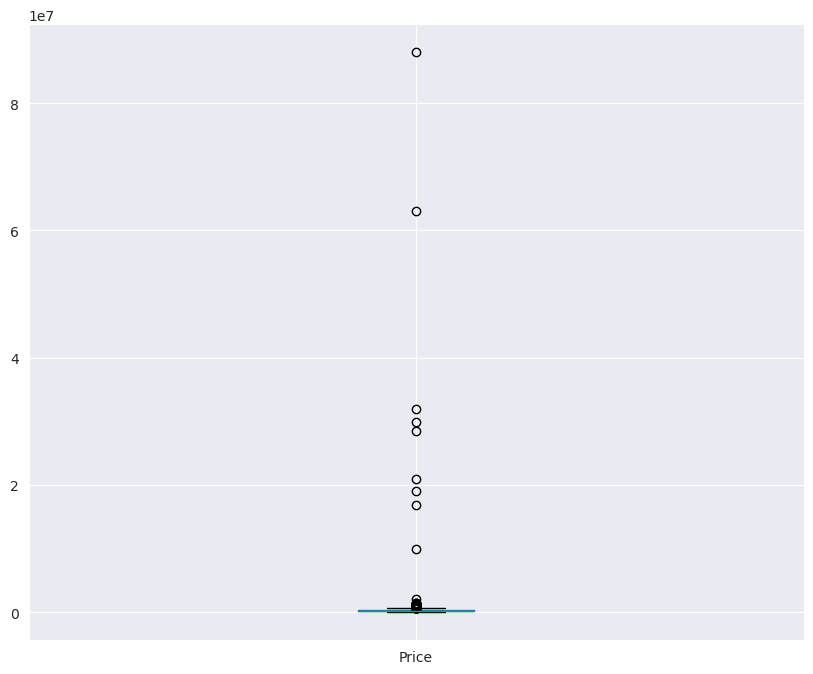

In [159]:
plt.figure(figsize=(10, 8))
final_df.boxplot(column='Price')
plt.show()

In [160]:
px.box(data_frame=final_df, y='Price')

Normal distribution Mean: 3.1409e+05, Skew: 37.274 and Std Deviation: 1.757e+06


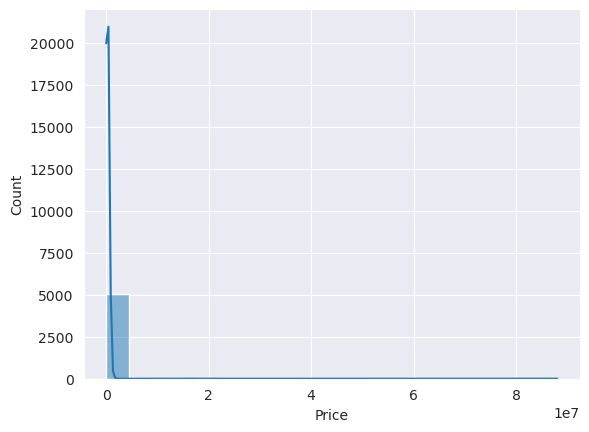

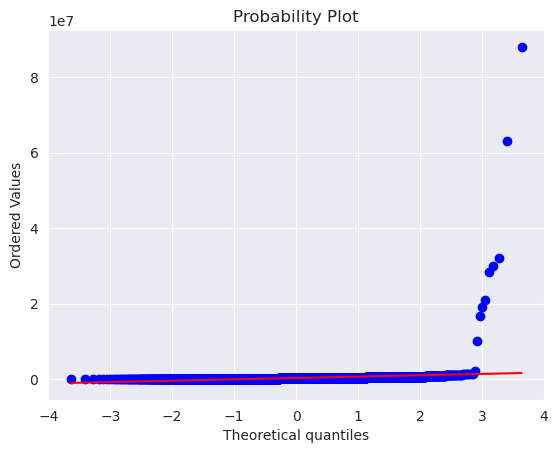

In [161]:
sns.histplot(final_df['Price'], bins=20, kde=True)

(mu, sigma) = norm.fit(final_df['Price'])
print(f'Normal distribution Mean: {mu:.5}, Skew: {final_df.Price.skew():.5} and Std Deviation: {sigma:.5}')

# QQ-Plot
fig = plt.figure()
res = stats.probplot(final_df['Price'], plot=plt)
plt.show()

Before removing the outliers, let's set a baseline with the data we got

<h2> Modelling </h2>

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OrdinalEncoder, MultiLabelBinarizer
from math import sqrt

In [163]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [164]:
models = {
    'Random Forest': RandomForestRegressor(),
    'XGBoost' : XGBRegressor(),
    'LightGBM': LGBMRegressor(verbosity=-1),
    'CatBoost': CatBoostRegressor(verbose=False),
    'Gradient Boost': GradientBoostingRegressor()
}

In [165]:
X = final_df[['Bedrooms']]
y = final_df['Price']

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [167]:
def print_model_score(X_train, X_test, y_train, y_test):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        print('---------------------------------------------------------')
        print(model_name)
        print(f"Test data RMSE: {sqrt(mean_squared_error(y_pred=pred, y_true=y_test)):.6}")
        print(f"Test data R2 Score: {r2_score(y_pred=pred, y_true=y_test):.6}")

In [168]:
print_model_score(X_train, X_test, y_train, y_test)

---------------------------------------------------------
Random Forest
Test data RMSE: 2.17979e+06
Test data R2 Score: 0.00919812
---------------------------------------------------------
XGBoost
Test data RMSE: 2.18044e+06
Test data R2 Score: 0.0086038
---------------------------------------------------------
LightGBM
Test data RMSE: 2.18046e+06
Test data R2 Score: 0.00858415
---------------------------------------------------------
CatBoost
Test data RMSE: 2.18044e+06
Test data R2 Score: 0.00860405
---------------------------------------------------------
Gradient Boost
Test data RMSE: 2.18044e+06
Test data R2 Score: 0.0086013


<h2> Convert categorical columns to numeric </h2>

In [169]:
final_df.drop(['Payment_type', 'Location'], axis=1, inplace=True)

In [170]:
final_df.columns

Index(['Bedrooms', 'Bathrooms', 'Date', 'Amenities', 'Property Type', 'Price',
       'Sub_county'],
      dtype='object')

In [171]:
final_df[final_df.duplicated()].count()

Bedrooms         24
Bathrooms        24
Date             24
Amenities        24
Property Type    24
Price            24
Sub_county       24
dtype: int64

In [172]:
final_df.drop_duplicates(inplace=True, ignore_index=True)

In [173]:
final_df.count()

Bedrooms         5030
Bathrooms        5030
Date             5030
Amenities        5030
Property Type    5030
Price            5030
Sub_county       5030
dtype: int64

In [174]:
string_cols = ['Sub_county', 'Property Type']

In [175]:
ordinal_encoder = OrdinalEncoder()
final_df[string_cols] = ordinal_encoder.fit_transform(final_df[string_cols])
ordinal_encoder.categories_

[array(['Dagoretti North', 'Dagoretti South', 'Embakasi Central',
        'Embakasi East', 'Embakasi South', 'Kamukunji', 'Kasarani',
        'Kibra', 'Langata', 'Makadara', 'Roysambu', 'Unknown', 'Westlands'],
       dtype=object),
 array(['flats-apartments', 'houses'], dtype=object)]

In [176]:
final_df.head()

,Bedrooms,Bathrooms,Date,Amenities,Property Type,Price,Sub_county
0,5.0000,5.0000,2024-07-23,"['Alarm', 'BBQ', 'Backup Generator', 'Balcony'...",1.0000,350000,8.0000
1,5.0000,5.0000,2024-07-25,"['Alarm', 'BBQ', 'Backup Generator', 'Balcony'...",1.0000,380000,8.0000
2,5.0000,5.0000,2024-07-19,"['Backup Generator', 'Balcony', 'En Suite', 'G...",1.0000,430000,12.0000
3,4.0000,5.0000,2024-07-31,"['BBQ', 'Backup Generator', 'Balcony', 'Boreho...",1.0000,4000,12.0000
4,4.0000,4.0000,2024-07-31,"['Alarm', 'BBQ', 'Backup Generator', 'Balcony'...",1.0000,300000,12.0000


<h2> Use one-hot encoding for the Amenities </h2>

In [177]:
def preprocess_amenities(amenities):
    amenities = amenities.replace('[', '')
    amenities = amenities.replace(']', '')
    amenities = amenities.replace("'", "")
    amenities = amenities.strip()
    return amenities

In [178]:
final_df['Amenities'] = final_df['Amenities'].apply(preprocess_amenities)

In [179]:
final_df['Amenities'].head()

0    Alarm, BBQ, Backup Generator, Balcony, Borehol...
1    Alarm, BBQ, Backup Generator, Balcony, Borehol...
2    Backup Generator, Balcony, En Suite, Garden, G...
3    BBQ, Backup Generator, Balcony, Borehole, Bus ...
4    Alarm, BBQ, Backup Generator, Balcony, Borehol...
Name: Amenities, dtype: object

In [180]:
mlb = MultiLabelBinarizer()

In [181]:
amenities_df = pd.DataFrame(mlb.fit_transform(final_df['Amenities'].str.split(', ')), columns=[x.strip() for x in mlb.classes_], index=final_df.index)

In [182]:
mlb.classes_

array(['', 'Aircon', 'Alarm', 'BBQ', 'Backup Generator', 'Balcony',
       'Borehole', 'Bus Stop', 'CCTV', 'Electric Fence', 'En Suite',
       'Fibre Internet', 'Furnished', 'Garden', 'Gated Community',
       'Golf Course', 'Gym', 'Hospital', 'Kids Play Area',
       'Lift/Elevator', 'Parking', 'Pet Friendly', 'Scenic View',
       'School', 'Sea View', 'Service Charge Included', 'Serviced',
       'Shopping Centre', 'Staff Quarters', 'Swimming Pool',
       'Walk In Closet', 'Wheelchair Access'], dtype=object)

In [183]:
amenities_df.head()

,,Aircon,Alarm,BBQ,Backup Generator,Balcony,Borehole,Bus Stop,CCTV,Electric Fence,...,Scenic View,School,Sea View,Service Charge Included,Serviced,Shopping Centre,Staff Quarters,Swimming Pool,Walk In Closet,Wheelchair Access
0,0,0,1,1,1,1,1,1,1,1,...,0,1,0,1,0,1,1,1,1,1
1,0,0,1,1,1,1,1,1,1,1,...,1,1,0,0,0,1,1,0,1,0
2,0,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,0,0,0,1,1,1,1,1,1,1,...,1,1,0,1,0,0,1,1,1,0
4,0,0,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,0


In [184]:
final_df = pd.concat([final_df.drop('Amenities', axis=1), amenities_df.drop('', axis=1)],axis=1)

In [185]:
final_df.tail()

,Bedrooms,Bathrooms,Date,Property Type,Price,Sub_county,Aircon,Alarm,BBQ,Backup Generator,...,Scenic View,School,Sea View,Service Charge Included,Serviced,Shopping Centre,Staff Quarters,Swimming Pool,Walk In Closet,Wheelchair Access
5025,2.0000,1.0000,2024-04-16,0.0000,110000,0.0000,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0
5026,2.0000,2.0000,2024-04-16,0.0000,230000,0.0000,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5027,2.0000,2.0000,2024-04-16,0.0000,220000,12.0000,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5028,3.0000,3.0000,2024-04-16,0.0000,350000,0.0000,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
5029,1.0000,1.0000,2024-04-16,0.0000,230000,0.0000,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [186]:
print(final_df.corr().Price.sort_values(ascending=False).head())
print('\n')
print(final_df.corr().Price.sort_values(ascending=False).tail())

Price            1.0000
Bedrooms         0.0863
Bathrooms        0.0842
Staff Quarters   0.0682
Garden           0.0418
Name: Price, dtype: float64


Serviced                  -0.0171
Furnished                 -0.0265
Pet Friendly              -0.0283
Lift/Elevator             -0.0302
Service Charge Included   -0.0371
Name: Price, dtype: float64


In [187]:
X = final_df.drop(['Price', 'Date'], axis=1)
y = final_df['Price']

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [189]:
print_model_score(X_train, X_test, y_train, y_test)

---------------------------------------------------------
Random Forest
Test data RMSE: 1.01239e+06
Test data R2 Score: -37.0785
---------------------------------------------------------
XGBoost
Test data RMSE: 1.37688e+06
Test data R2 Score: -69.4327
---------------------------------------------------------
LightGBM
Test data RMSE: 5.08427e+05
Test data R2 Score: -8.60372
---------------------------------------------------------
CatBoost
Test data RMSE: 8.90816e+05
Test data R2 Score: -28.4821
---------------------------------------------------------
Gradient Boost
Test data RMSE: 4.31272e+05
Test data R2 Score: -5.91012


<h2> Remove outliers </h2>

We want our price data to be above the selling price 10000

In [191]:
final_df[final_df.Price < 10000].Bedrooms.count()

49

In [192]:
final_df = final_df[final_df.Price >= 10000].reset_index(drop=True)

We also want the price data to be below 40m

In [195]:
final_df = final_df[final_df.Price < 40000000].reset_index(drop=True)

In [196]:
final_df.shape

(4979, 37)

Train the model

In [197]:
X = final_df.drop(['Price', 'Date'], axis=1)
y = final_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [198]:
print_model_score(X_train, X_test, y_train, y_test)

---------------------------------------------------------
Random Forest
Test data RMSE: 1.12805e+06
Test data R2 Score: -0.533424
---------------------------------------------------------
XGBoost
Test data RMSE: 1.09831e+06
Test data R2 Score: -0.453648
---------------------------------------------------------
LightGBM
Test data RMSE: 9.37279e+05
Test data R2 Score: -0.0586322
---------------------------------------------------------
CatBoost
Test data RMSE: 9.78751e+05
Test data R2 Score: -0.154388
---------------------------------------------------------
Gradient Boost
Test data RMSE: 8.93397e+05
Test data R2 Score: 0.0381751


At least GradientBoost didn't give me a negative

Apply Interquartile range to get rid of the outliers

In [199]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = final_df['Price'].quantile(0.25)
Q3 = final_df['Price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
final_df_no_outliers = final_df[(final_df['Price'] >= lower_bound) & (final_df['Price'] <= upper_bound)].reset_index(drop=True)

In [200]:
px.box(data_frame=final_df, y='Price', title='Boxplot before IQR Outlier Removal')

In [201]:
px.box(data_frame=final_df_no_outliers, y='Price', title='Boxplot after IQR Outlier Removal')

In [202]:
print(f'Number of rows after IQR outlier removal: {final_df_no_outliers.Bedrooms.count()}')

Number of rows after IQR outlier removal: 4865


In [203]:
X = final_df_no_outliers.drop(['Price', 'Date'], axis=1)
y = final_df_no_outliers['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [204]:
print_model_score(X_train, X_test, y_train, y_test)

---------------------------------------------------------
Random Forest
Test data RMSE: 80391.6
Test data R2 Score: 0.648943
---------------------------------------------------------
XGBoost
Test data RMSE: 80171.8
Test data R2 Score: 0.65086
---------------------------------------------------------
LightGBM
Test data RMSE: 76229.3
Test data R2 Score: 0.684354
---------------------------------------------------------
CatBoost
Test data RMSE: 76576.9
Test data R2 Score: 0.681469
---------------------------------------------------------
Gradient Boost
Test data RMSE: 79074.0
Test data R2 Score: 0.660356


Got a massive imporovement with LightGBM being the highest - 0.684

<h2> Log Transforming the Price Column </h2>

Without Outliers Removed

In [205]:
final_df['Log Price'] = np.log(final_df['Price'])

In [206]:
final_df[['Price', 'Log Price']].head()

,Price,Log Price
0,350000,12.7657
1,380000,12.8479
2,430000,12.9715
3,300000,12.6115
4,300000,12.6115


In [207]:
final_df['Log Price'].describe()

count   4979.0000
mean      12.2403
std        0.7240
min        9.2103
25%       11.8494
50%       12.3014
75%       12.7657
max       17.2812
Name: Log Price, dtype: float64

Normal distribution Mean: 12.24, Skew: -0.25416 and Std Deviation: 0.72398


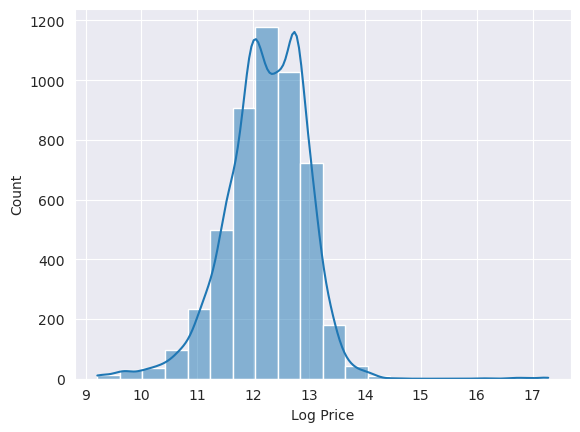

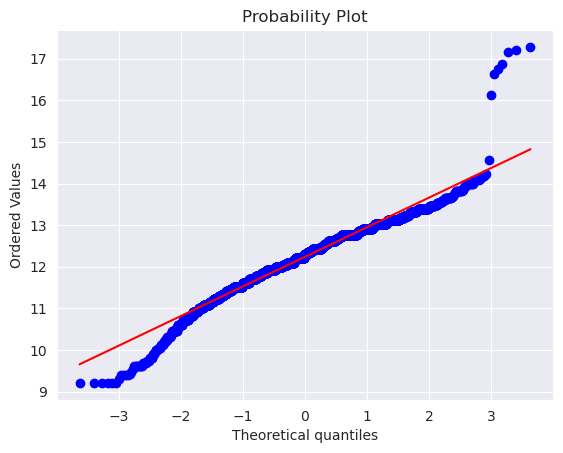

In [208]:
sns.histplot(final_df['Log Price'], bins=20, kde=True)

(mu, sigma) = norm.fit(final_df['Log Price'])
print(f'Normal distribution Mean: {mu:.5}, Skew: {final_df['Log Price'].skew():.5} and Std Deviation: {sigma:.5}')

# QQ-Plot
fig = plt.figure()
res = stats.probplot(final_df['Log Price'], plot=plt)
plt.show()

In [209]:
# Reverse log the prices
def logs_print_model_score(X_train, X_test, y_train, y_test):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        print('---------------------------------------------------------')
        print(model_name)
        print(f"Test data RMSE: {sqrt(mean_squared_error(y_pred=np.exp(pred), y_true=np.exp(y_test))):.6}")
        print(f"Test data R2 Score: {r2_score(y_pred=np.exp(pred), y_true=np.exp(y_test)):.6}")

In [210]:
X = final_df.drop(['Price', 'Log Price', 'Date'], axis=1)
y = final_df['Log Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [211]:
print_model_score(X_train, X_test, y_train, y_test)

---------------------------------------------------------
Random Forest
Test data RMSE: 0.441933
Test data R2 Score: 0.633088
---------------------------------------------------------
XGBoost
Test data RMSE: 0.441809
Test data R2 Score: 0.633294
---------------------------------------------------------
LightGBM
Test data RMSE: 0.413892
Test data R2 Score: 0.678172
---------------------------------------------------------
CatBoost
Test data RMSE: 0.411401
Test data R2 Score: 0.682035
---------------------------------------------------------
Gradient Boost
Test data RMSE: 0.42435
Test data R2 Score: 0.661704


In [212]:
logs_print_model_score(X_train, X_test, y_train, y_test)

---------------------------------------------------------
Random Forest
Test data RMSE: 9.01636e+05
Test data R2 Score: 0.0203522
---------------------------------------------------------
XGBoost
Test data RMSE: 9.02256e+05
Test data R2 Score: 0.0190044
---------------------------------------------------------
LightGBM
Test data RMSE: 9.01129e+05
Test data R2 Score: 0.0214546
---------------------------------------------------------
CatBoost
Test data RMSE: 9.01807e+05
Test data R2 Score: 0.0199812
---------------------------------------------------------
Gradient Boost
Test data RMSE: 9.00492e+05
Test data R2 Score: 0.0228362


After Outlier Removal

In [213]:
final_df_no_outliers['Log Price'] = np.log(final_df_no_outliers['Price'])

In [214]:
final_df_no_outliers[['Price', 'Log Price']].tail()

,Price,Log Price
4860,110000,11.6082
4861,230000,12.3458
4862,220000,12.3014
4863,350000,12.7657
4864,230000,12.3458


In [215]:
final_df_no_outliers['Log Price'].describe()

count   4865.0000
mean      12.2021
std        0.6766
min        9.2103
25%       11.8130
50%       12.2061
75%       12.7657
max       13.4075
Name: Log Price, dtype: float64

Normal distribution Mean: 12.202, Skew: -0.84341 and Std Deviation: 0.67649


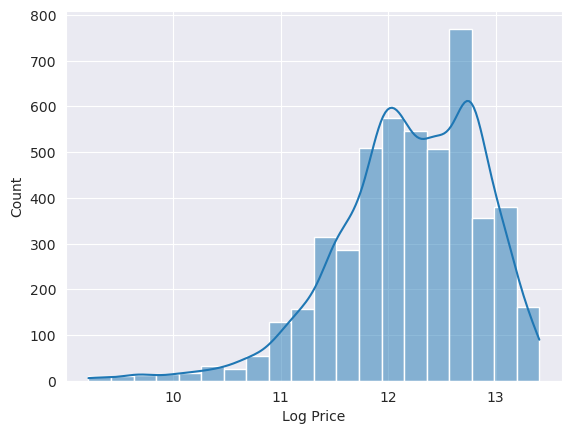

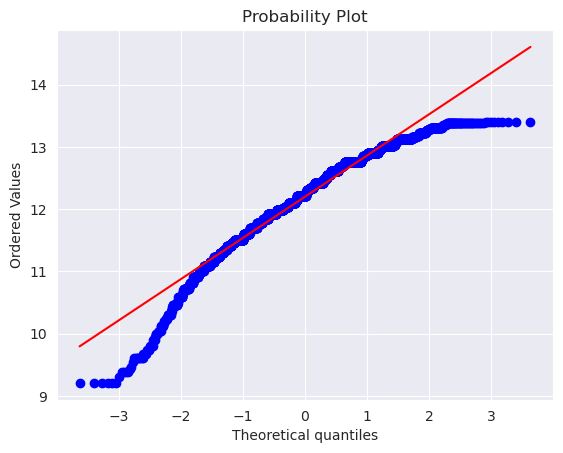

In [216]:
sns.histplot(final_df_no_outliers['Log Price'], bins=20, kde=True)

(mu, sigma) = norm.fit(final_df_no_outliers['Log Price'])
print(f'Normal distribution Mean: {mu:.5}, Skew: {final_df_no_outliers['Log Price'].skew():.5} and Std Deviation: {sigma:.5}')

# QQ-Plot
fig = plt.figure()
res = stats.probplot(final_df_no_outliers['Log Price'], plot=plt)
plt.show()

In [217]:
X = final_df_no_outliers.drop(['Price', 'Log Price', 'Date'], axis=1)
y = final_df_no_outliers['Log Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [218]:
print_model_score(X_train, X_test, y_train, y_test)

---------------------------------------------------------
Random Forest
Test data RMSE: 0.3829
Test data R2 Score: 0.694422
---------------------------------------------------------
XGBoost
Test data RMSE: 0.369183
Test data R2 Score: 0.715923
---------------------------------------------------------
LightGBM
Test data RMSE: 0.357243
Test data R2 Score: 0.734002
---------------------------------------------------------
CatBoost
Test data RMSE: 0.354461
Test data R2 Score: 0.738128
---------------------------------------------------------
Gradient Boost
Test data RMSE: 0.373074
Test data R2 Score: 0.709904


In [219]:
logs_print_model_score(X_train, X_test, y_train, y_test)

---------------------------------------------------------
Random Forest
Test data RMSE: 80833.9
Test data R2 Score: 0.645069
---------------------------------------------------------
XGBoost
Test data RMSE: 81307.0
Test data R2 Score: 0.640903
---------------------------------------------------------
LightGBM
Test data RMSE: 77409.4
Test data R2 Score: 0.674505
---------------------------------------------------------
CatBoost
Test data RMSE: 78758.1
Test data R2 Score: 0.663065
---------------------------------------------------------
Gradient Boost
Test data RMSE: 80376.3
Test data R2 Score: 0.649076


Transforming the target variable didn't quite increase the results as expected

<h2> Convert date to features </h2>

In [220]:
final_df_no_outliers['Month'] = final_df_no_outliers['Date'].dt.month
final_df_no_outliers['Year'] = final_df_no_outliers['Date'].dt.year
final_df_no_outliers['Day'] = final_df_no_outliers['Date'].dt.day
final_df_no_outliers['Day of Week'] = final_df_no_outliers['Date'].dt.dayofweek

In [221]:
final_df_no_outliers.corr()

,Bedrooms,Bathrooms,Date,Property Type,Price,Sub_county,Aircon,Alarm,BBQ,Backup Generator,...,Shopping Centre,Staff Quarters,Swimming Pool,Walk In Closet,Wheelchair Access,Log Price,Month,Year,Day,Day of Week
Bedrooms,1.0000,0.9059,0.0521,0.6436,0.6465,0.1593,0.0557,0.0377,0.1447,-0.0701,...,0.0436,0.5699,-0.2026,0.2194,-0.0296,0.5936,0.0460,0.0176,0.0384,0.0223
Bathrooms,0.9059,1.0000,0.0299,0.5635,0.6402,0.1339,0.1384,0.0894,0.2135,0.0178,...,0.0549,0.5700,-0.1227,0.2572,0.0513,0.5948,0.0250,0.0181,0.0257,0.0292
Date,0.0521,0.0299,1.0000,0.0410,0.0649,-0.0014,0.0346,0.1071,0.0413,0.0870,...,0.1169,0.1148,0.0203,0.0936,0.0470,0.0723,0.9837,0.1028,0.2347,-0.0385
Property Type,0.6436,0.5635,0.0410,1.0000,0.5309,0.2146,0.0037,0.0209,0.1207,-0.1880,...,0.0457,0.5185,-0.3877,0.1148,-0.0918,0.4497,0.0343,0.0169,0.0412,0.0254
Price,0.6465,0.6402,0.0649,0.5309,1.0000,0.2179,0.0570,0.1527,0.1718,0.1099,...,0.0538,0.4764,-0.0415,0.2124,0.0521,0.9187,0.0534,0.0239,0.0740,0.0061
Sub_county,0.1593,0.1339,-0.0014,0.2146,0.2179,1.0000,-0.0316,0.0098,0.0497,-0.0326,...,0.0119,0.0753,-0.0606,0.0142,-0.0484,0.1906,0.0045,-0.0151,-0.0300,-0.0553
Aircon,0.0557,0.1384,0.0346,0.0037,0.0570,-0.0316,1.0000,0.3289,0.2843,0.2015,...,0.1742,0.1202,0.1234,0.2619,0.3122,0.0484,0.0266,0.0098,0.0558,0.0664
Alarm,0.0377,0.0894,0.1071,0.0209,0.1527,0.0098,0.3289,1.0000,0.4774,0.4659,...,0.3805,0.2172,0.2148,0.3922,0.4859,0.1777,0.0863,0.0233,0.1508,0.1433
BBQ,0.1447,0.2135,0.0413,0.1207,0.1718,0.0497,0.2843,0.4774,1.0000,0.3598,...,0.3190,0.3002,0.1469,0.3966,0.4191,0.1791,0.0276,0.0197,0.0894,0.1215
Backup Generator,-0.0701,0.0178,0.0870,-0.1880,0.1099,-0.0326,0.2015,0.4659,0.3598,1.0000,...,0.3758,0.1301,0.3717,0.3072,0.3762,0.1650,0.0767,0.0091,0.0829,0.1328


In [222]:
X = final_df_no_outliers.drop(['Price', 'Log Price', 'Date'], axis=1)
y = final_df_no_outliers['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [223]:
print_model_score(X_train, X_test, y_train, y_test)

---------------------------------------------------------
Random Forest
Test data RMSE: 78497.5
Test data R2 Score: 0.66529
---------------------------------------------------------
XGBoost
Test data RMSE: 79266.5
Test data R2 Score: 0.658701
---------------------------------------------------------
LightGBM
Test data RMSE: 75516.1
Test data R2 Score: 0.690233
---------------------------------------------------------
CatBoost
Test data RMSE: 75982.6
Test data R2 Score: 0.686394
---------------------------------------------------------
Gradient Boost
Test data RMSE: 78956.5
Test data R2 Score: 0.661365


Got a slight improvement from 0.68 to 0.69

<h2> Feature Selection </h2>

In [224]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort

In [225]:
def lgb_model_performance(X_train, X_test, y_train, y_test):
    lgb_model = LGBMRegressor(verbosity=-1)

    lgb_model.fit(X_train, y_train)

    y_pred_train = lgb_model.predict(X_train)
    y_pred_test = lgb_model.predict(X_test)
    
    print('Training Root Mean Squared Error: ', sqrt(mean_squared_error(y_true=y_train, y_pred=y_pred_train)))
    print('Test Root Mean Squared Error: ', sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_test)))
    print('\n')
    print('Training R2 Score: ', r2_score(y_true=y_train, y_pred=y_pred_train))
    print('Test R2 Score: ', r2_score(y_true=y_test, y_pred=y_pred_test))
    
    return lgb_model

In [226]:
model = lgb_model_performance(X_train, X_test, y_train, y_test)

Training Root Mean Squared Error:  59409.47280138463
Test Root Mean Squared Error:  75516.0510134372


Training R2 Score:  0.8202853708435678
Test R2 Score:  0.690233219444625


Plot Feature importance

In [228]:
feature_importances = model.feature_importances_
feature_names = X_train.columns
fi_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
fi_df = fi_df.sort_values(by='importance', ascending=False)

In [229]:
fi_df

,feature,importance
37,Day,342
3,Sub_county,251
1,Bathrooms,217
0,Bedrooms,208
35,Month,191
38,Day of Week,173
2,Property Type,102
17,Gated Community,94
32,Swimming Pool,86
15,Furnished,81


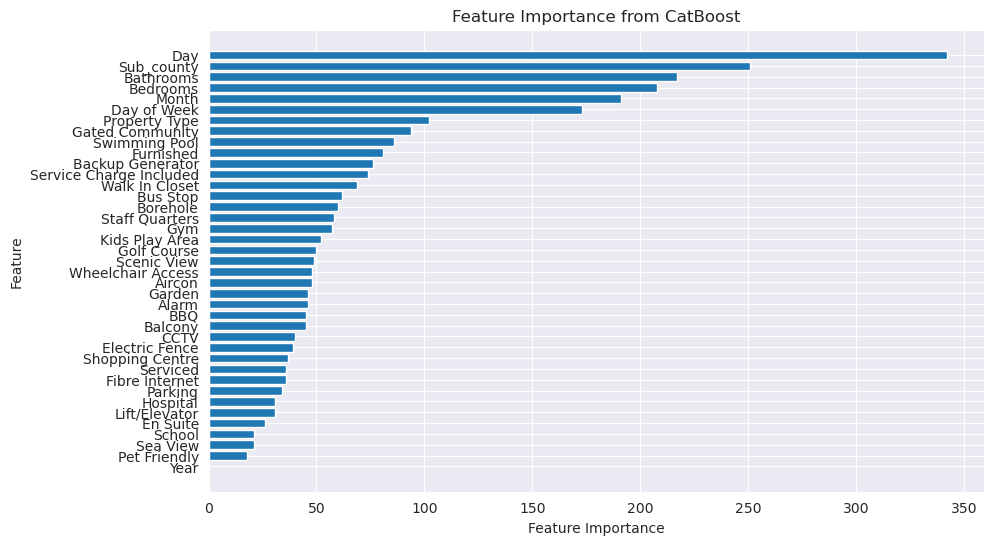

In [232]:
plt.figure(figsize=(10, 6))
plt.barh(fi_df['feature'], fi_df['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from CatBoost')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

In [233]:
thresholds = sort(model.feature_importances_)

In [234]:
thresholds

array([  0,  18,  21,  21,  26,  31,  31,  34,  36,  36,  37,  39,  40,
        45,  45,  46,  46,  48,  48,  49,  50,  52,  57,  58,  60,  62,
        69,  74,  76,  81,  86,  94, 102, 173, 191, 208, 217, 251, 342],
      dtype=int32)

Select the right number of features needed for training

In [237]:
# Pick models with best performance above the provided thresholds
for thresh in thresholds:
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    
    selection_model = LGBMRegressor(verbosity=-1)
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    r2 = r2_score(y_test, predictions)
    print(f"Threshold: {thresh}, Number of features: {select_X_train.shape[1]}, R2_Score: {r2:.5}")

Threshold: 0, Number of features: 39, R2_Score: 0.69023
Threshold: 18, Number of features: 38, R2_Score: 0.69023
Threshold: 21, Number of features: 37, R2_Score: 0.68241
Threshold: 21, Number of features: 37, R2_Score: 0.68241
Threshold: 26, Number of features: 35, R2_Score: 0.68965
Threshold: 31, Number of features: 34, R2_Score: 0.69047
Threshold: 31, Number of features: 34, R2_Score: 0.69047
Threshold: 34, Number of features: 32, R2_Score: 0.69397
Threshold: 36, Number of features: 31, R2_Score: 0.68962
Threshold: 36, Number of features: 31, R2_Score: 0.68962
Threshold: 37, Number of features: 29, R2_Score: 0.68448
Threshold: 39, Number of features: 28, R2_Score: 0.68299
Threshold: 40, Number of features: 27, R2_Score: 0.68383
Threshold: 45, Number of features: 26, R2_Score: 0.6882
Threshold: 45, Number of features: 26, R2_Score: 0.6882
Threshold: 46, Number of features: 24, R2_Score: 0.68865
Threshold: 46, Number of features: 24, R2_Score: 0.68865
Threshold: 48, Number of features:

The threshold of 34 had the best results so I'll pick 32 features

In [238]:
relevant_features = fi_df.head(32).feature

In [239]:
final_df_no_outliers.duplicated().any()

False

In [242]:
X_relevant = final_df_no_outliers[relevant_features.to_numpy()]
y = final_df_no_outliers['Price']

X_train, X_test, y_train, y_test = train_test_split(X_relevant, y, test_size=0.2, random_state=101)

model = lgb_model_performance(X_train, X_test, y_train, y_test)

Training Root Mean Squared Error:  59999.7929226716
Test Root Mean Squared Error:  75059.38297796529


Training R2 Score:  0.8166961709314609
Test R2 Score:  0.693968395161632


Final results from the rent data is an R2 score of 0.694